In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [8]:
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\health_lifestyle_dataset (1).csv")
df.head(10000)

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,38,Female,35.7,4249,4.0,5.0,1809,0,0,87,128,106,256,1,0
9996,9997,23,Female,21.3,9747,5.6,1.2,2625,0,0,72,139,98,259,0,0
9997,9998,18,Male,26.5,1965,4.1,0.6,2621,0,0,57,130,74,181,0,0
9998,9999,21,Male,38.1,6834,9.4,0.9,2932,0,0,73,164,92,182,1,0


In [9]:
df = pd.read_csv("health_lifestyle_dataset.csv")
df.head(10000)

FileNotFoundError: [Errno 2] No such file or directory: 'health_lifestyle_dataset.csv'

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()


,0
id,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

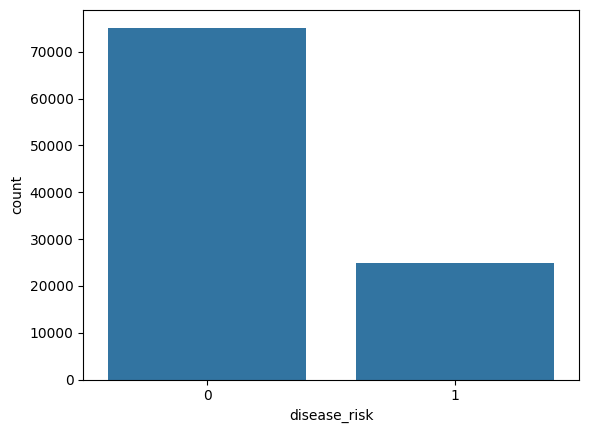

In [ ]:
sns.countplot(x='disease_risk', data=df)
plt.show()


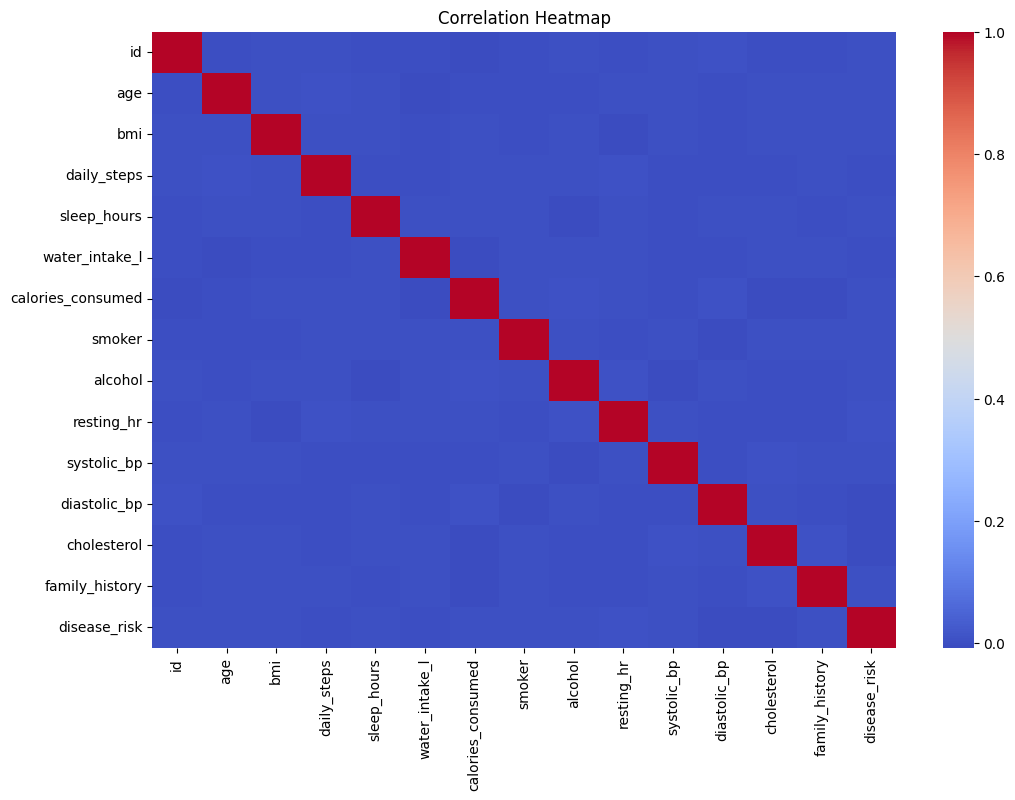

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
cat_cols = df.select_dtypes(include='object').columns


label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
def disease_risk_logic(row):
    score = 0

    # Age factor
    if row['age'] >= 55:
        score += 2
    elif row['age'] >= 40:
        score += 1

    # BMI factor
    if row['bmi'] >= 30:
        score += 2
    elif row['bmi'] >= 25:
        score += 1

    # Blood pressure
    if row['systolic_bp'] >= 140 or row['diastolic_bp'] >= 90:
        score += 2
    elif row['systolic_bp'] >= 130:
        score += 1

    # Cholesterol
    if row['cholesterol'] >= 240:
        score += 2
    elif row['cholesterol'] >= 200:
        score += 1

    # Heart rate
    if row['resting_hr'] >= 100:
        score += 1

    # Lifestyle habits
    if row['smoker'] == 1:
        score += 2

    if row['alcohol'] == 1:
        score += 1

    # Physical activity
    if row['daily_steps'] < 5000:
        score += 2
    elif row['daily_steps'] < 8000:
        score += 1

    # Sleep
    if row['sleep_hours'] < 6:
        score += 1

    # Water intake
    if row['water_intake_l'] < 2:
        score += 1

    # Family history
    if row['family_history'] == 1:
        score += 2

    # Final risk classification
    if score <= 4:
        return 0      # Low Risk
    elif score <= 9:
        return 1      # Medium Risk
    else:
        return 2      # High Risk


In [ ]:
df['disease_risk'] = df.apply(disease_risk_logic, axis=1)


In [ ]:
df['disease_risk'].value_counts(normalize=True)


,proportion
disease_risk,
1,0.69569
2,0.18993
0,0.11438


In [ ]:
features = [
    'age','bmi','daily_steps','sleep_hours',
    'smoker','alcohol','resting_hr',
    'systolic_bp','diastolic_bp',
    'cholesterol','family_history'
]

X = df[features]
y = df['disease_risk']


In [ ]:
X = df[['age','bmi','systolic_bp','cholesterol','smoker','daily_steps','family_history']]
y = df['disease_risk']


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.83755


In [ ]:
print("Train Accuracy:", gb.score(X_train, y_train))
print("Test Accuracy:", gb.score(X_test, y_test))


Train Accuracy: 0.83865
Test Accuracy: 0.83755


In [ ]:
# Save feature names used during training
feature_names = X_train.columns.tolist()

import pickle

with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)


In [ ]:
import pickle

# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(gb, f)

# Save label encoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("Model and encoders saved successfully!")


Model and encoders saved successfully!
